## Combining dataframes for Diverity Index
Zoe Zhou for EDS 220 

In [32]:
import pandas as pd 
surveys_df = pd.read_csv("../data/data-raw/surveys.csv",
                        keep_default_na=False, na_values=[""])
species_df = pd.read_csv("../data/data-raw/species.csv",
                        keep_default_na=False, na_values=[""])
# prepare two subsets of ssurveys_df
surveys_head = surveys_df.head(10)
surveys_tail = surveys_df.tail(10)
# reset tail index
surveys_tail = surveys_tail.reset_index(drop=True)
# stack on top of each other
vertical_stack = pd.concat([surveys_head,surveys_tail], axis = 0)
# stack side by side 
horizontal_stack = pd.concat([surveys_head, surveys_tail], axis = 1)
# write df to csv 
vertical_stack.to_csv('../data/out.csv', index=False)
# read it back to check 
new_output = pd.read_csv('../data/out.csv', keep_default_na=False, na_values=[''])
new_output


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


,F,M
year,,
2001,36.034771,36.404196
2002,33.878761,37.490506


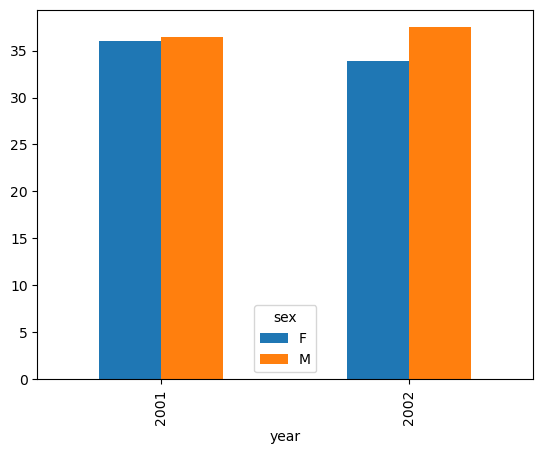

In [57]:
# read the file 
surveys2001 = pd.read_csv("../data/data-raw/surveys2001.csv",
                         keep_default_na=False, na_values=[''])
surveys2002 = pd.read_csv("../data/data-raw/surveys2002.csv", 
                         keep_default_na=False, na_values=[''])
# concatenate 
surveys_all = pd.concat([surveys2001, surveys2002], axis=0)
# get the weight for each year, grouped by sex 
weight_year = surveys_all.groupby(['year', 'sex'])['weight'].mean().unstack()
# plot: 
weight_year.plot(kind='bar')
# write to file 
weight_year.to_csv("weight_for_year.csv")
# read it back 
pd.read_csv("weight_for_year.csv", index_col=0)



<Axes: xlabel='plot_id'>

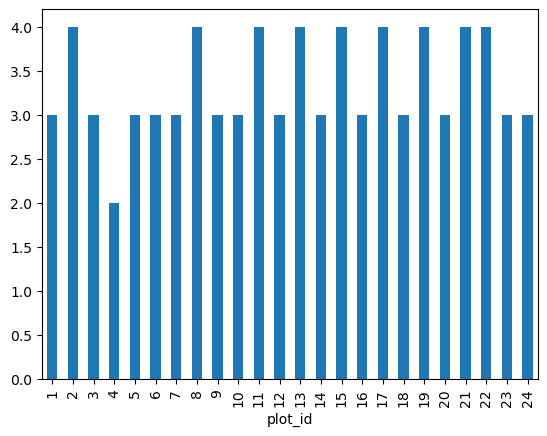

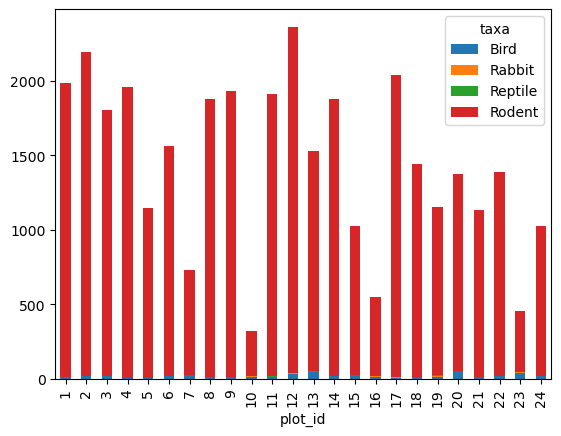

In [69]:
# Joining surveys and sspecies
merged_left = pd.merge(left = surveys_df, right = species_df, how = 'left', on='species_id')

merged_left.groupby(['plot_id'])['taxa'].nunique().plot(kind='bar')

id_per_taxa = merged_left.groupby(['plot_id','taxa']).count()['record_id'].unstack()

id_per_taxa.plot(kind='bar', stacked=True) #.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.05))


sex,F,M,M/F
plot_id,,,
1,1.0,1.0,3.0
2,1.0,1.0,4.0
3,1.0,1.0,3.0
4,1.0,1.0,2.0
5,1.0,1.0,3.0
6,1.0,1.0,3.0
7,1.0,1.0,3.0
8,1.0,1.0,4.0
9,1.0,1.0,3.0


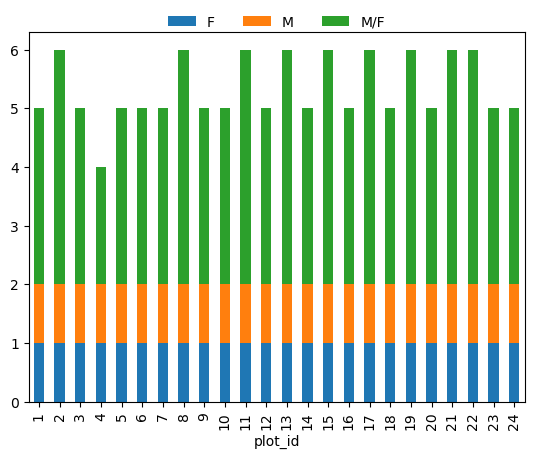

In [76]:
merged_left.loc[merged_left['sex'].isnull(), 'sex']= "M/F"
ntaxa_sex_site = merged_left.groupby(['plot_id', 'sex'])['taxa'].nunique().reset_index(level=1)

ntaxa_sex_site = ntaxa_sex_site.pivot_table(values='taxa', columns='sex', index=ntaxa_sex_site.index)


ntaxa_sex_site.plot(kind='bar', legend=False, stacked=True).legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.08), frameon=False)

ntaxa_sex_site


In [78]:
# Diversity Index 
plot_info = pd.read_csv("../data/data-raw/plots.csv")
plot_info.groupby('plot_type').count()

,plot_id
plot_type,
Control,8
Long-term Krat Exclosure,4
Rodent Exclosure,6
Short-term Krat Exclosure,4
Spectab exclosure,2


<Axes: title={'center': 'Diversity Index'}, ylabel='plot_id'>

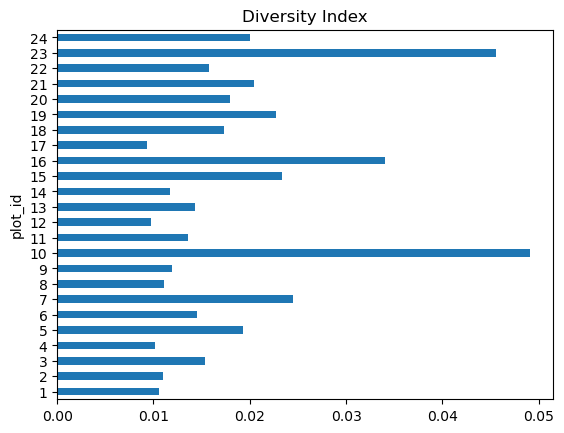

In [90]:
merged_site_type = pd.merge(merged_left, plot_info, on = "plot_id")
# get number of species for each plot 
nspecies_site = merged_site_type.groupby(['plot_id'])['species'].nunique().rename('nspecies')
# get n of individual for each plot 
nindividuals_site = merged_site_type.groupby(['plot_id']).count()['record_id'].rename('nindiv')

nspecies_site.head()

# combine two series 
diversity_index = pd.concat([nspecies_site, nindividuals_site], axis=1)

# calculate the diversity index
diversity_index['diversity'] = diversity_index['nspecies']/diversity_index['nindiv']
diversity_index['diversity'].plot(kind='barh', title='Diversity Index')
#.xlabel('Diversity Index')
